 # ARIMA

## Auto regression

In [289]:
import statsmodels.api as sms

In [290]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [291]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [292]:
df_airline.dropna(inplace=True)

In [293]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [294]:
df_airline['Month']= pd.to_datetime(df_airline['Month'])

In [295]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [296]:
df_airline.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

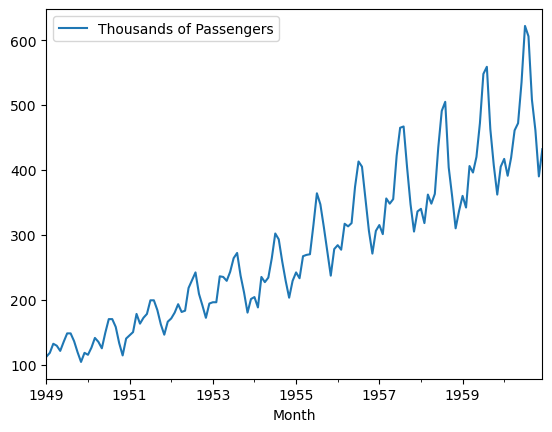

In [297]:
df_airline.plot()

In [298]:
from statsmodels.tsa.stattools import adfuller

In [299]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [300]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060435
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [301]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [302]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [303]:
df_airline.shape

(144, 2)

In [304]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169982
p- value: 0.054213290283827854
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [305]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [306]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246855
p- value: 2.732891850013928e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [307]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [308]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [309]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

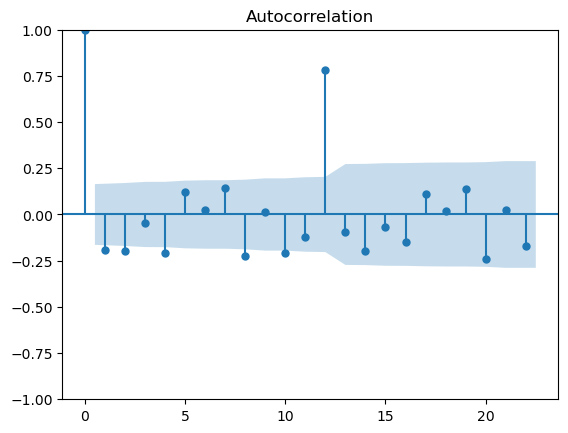

In [310]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

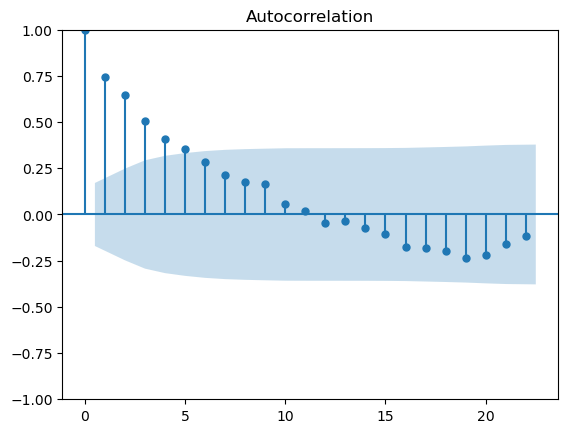

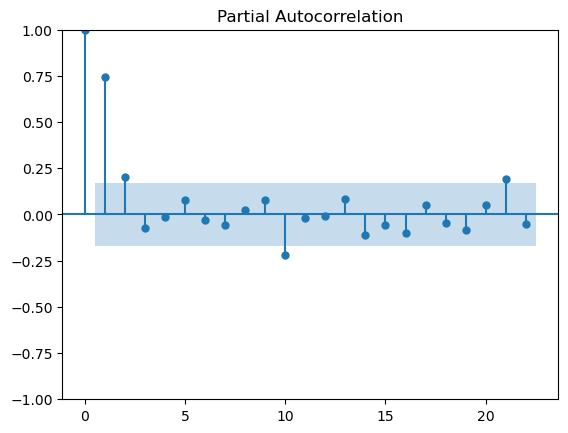

In [311]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

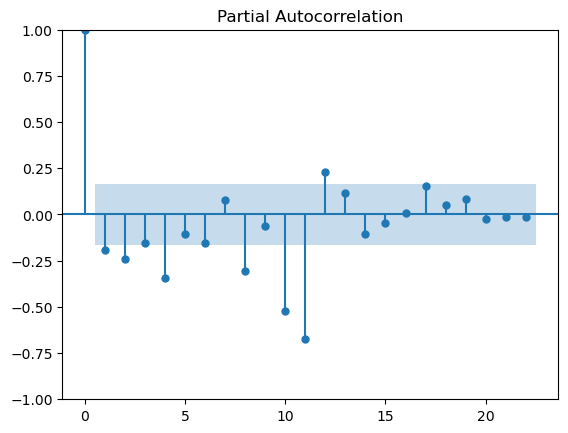

In [312]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

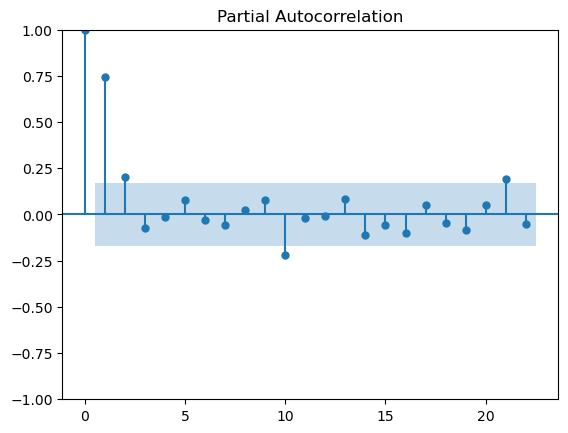

In [313]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [314]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [315]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [316]:
train=df_airline[:train_dataset_end]
train.dropna(inplace=True)
test=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]
test.dropna(inplace=True)

In [317]:
##prediction
pred_start_date=test.index[0]
pred_end_date=test.index[-1]

In [318]:
test

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [319]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [320]:
train

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1950-01-01,115.0,-3.0,-17.0,3.0
1950-02-01,126.0,11.0,14.0,8.0
1950-03-01,141.0,15.0,4.0,9.0
1950-04-01,135.0,-6.0,-21.0,6.0
1950-05-01,125.0,-10.0,-4.0,4.0
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [321]:
import statsmodels.api as sm
model_ARIMA= sm.tsa.arima.ARIMA(train['Thousands of Passengers'],order=(0,2,0))

In [214]:
model_Arima_fit=model_ARIMA.fit()

In [215]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   72
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -333.327
Date:                     Wed, 20 Mar 2024   AIC                            668.654
Time:                             18:31:49   BIC                            670.903
Sample:                         01-01-1950   HQIC                           669.547
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       800.9220    131.486      6.091      0.000     543.215    1058.629
===================================================================================
Ljung-Box (L1) (Q):                   3.94   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.05   Prob(JB):                         0.60
Heteroskedasticity (H):               2.90   Skew:                             0.29
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [327]:
test

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [328]:
##prediction
pred_start_date=test.index[0]
pred_end_date=test.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [329]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test['Thousands of Passengers']-pred

In [330]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [331]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<Axes: ylabel='Density'>

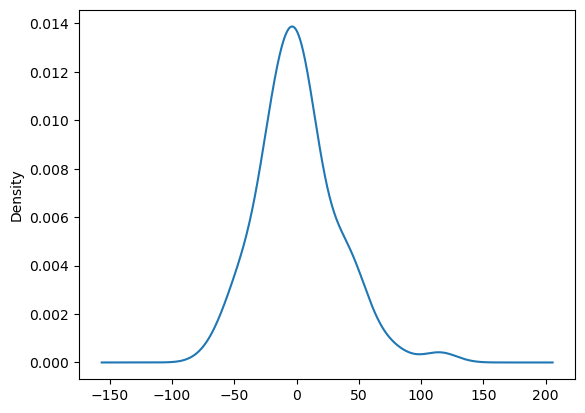

In [332]:
model_Arima_fit.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

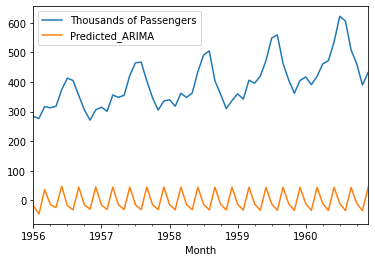

In [118]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [333]:
test['Predicted_ARIMA']=pred

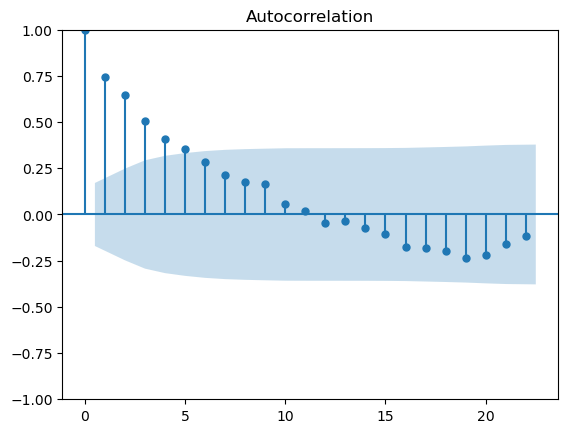

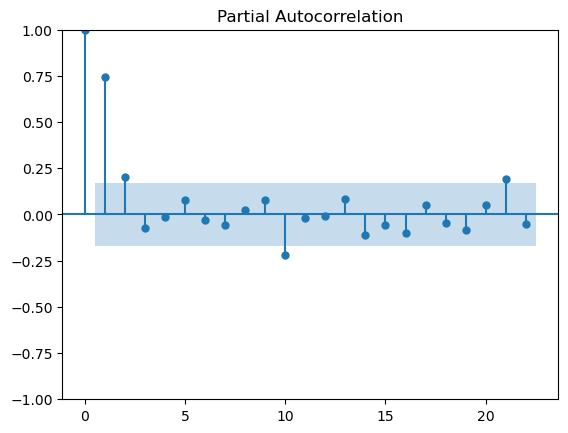

In [334]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

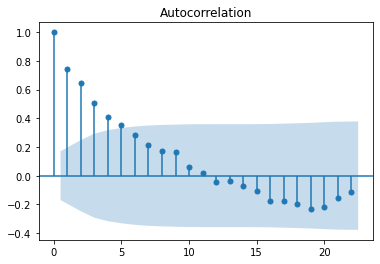

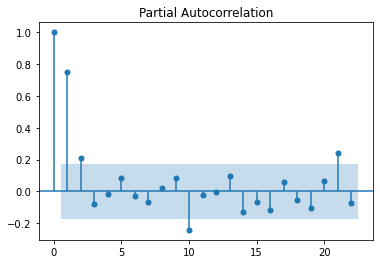

In [119]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

# SARIMA model

In [336]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [338]:
model_SARIMA=SARIMAX(train['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [339]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95018D+00    |proj g|=  6.58415D+00

At iterate    5    f=  3.14599D+00    |proj g|=  5.82087D-02

At iterate   10    f=  3.12695D+00    |proj g|=  7.46596D-03

At iterate   15    f=  3.12476D+00    |proj g|=  7.38928D-03

At iterate   20    f=  3.12388D+00    |proj g|=  3.87609D-03

At iterate   25    f=  3.12209D+00    |proj g|=  1.46791D-02

At iterate   30    f=  3.12024D+00    |proj g|=  2.09776D-02

At iterate   35    f=  3.11784D+00    |proj g|=  5.20515D-03

At iterate   40    f=  3.11747D+00    |proj g|=  9.85330D-03

At iterate   45    f=  3.11702D+00    |proj g|=  8.92516D-03

At iterate   50    f=  3.11681D+00    |proj g|=  2.87190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [340]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   72
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -224.411
Date:                             Wed, 20 Mar 2024   AIC                            466.821
Time:                                     18:38:31   BIC                            485.670
Sample:                                 01-01-1950   HQIC                           474.194
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6010      0.319     -1.882      0.060      -1.227       0.025
ar.L2          0.7260      0.090      8.097      0.000       0.550       0.902
ar.L3          0.8434      0.289      2.921      0.003       0.277       1.409
ma.L1          1.3799      0.781      1.766      0.077      -0.151       2.911
ma.L2          0.5575      0.682      0.817      0.414      -0.780       1.895
ma.L3         -0.4174      0.274     -1.524      0.128      -0.954       0.120
ma.L4         -0.4300      0.293     -1.466      0.143      -1.005       0.145
ma.L5         -0.3327      0.275     -1.212      0.226      -0.871       0.206
sigma2        95.3068     54.338      1.754      0.079     -11.194     201.808
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.86   Prob(JB):                         0.49
Heteroskedasticity (H):               1.28   Skew:                             0.37
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [342]:
test.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [345]:
##prediction
pred_start_date=test.index[0]
pred_end_date=test.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [347]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

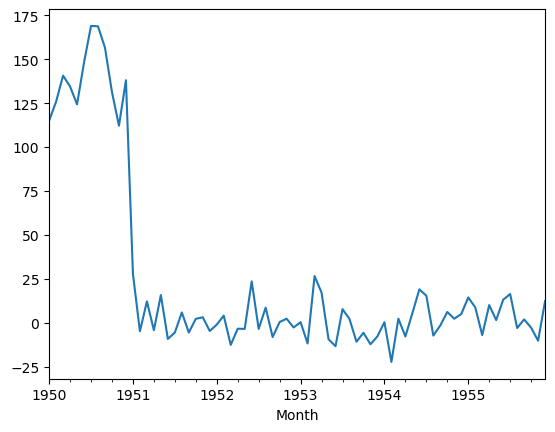

In [348]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

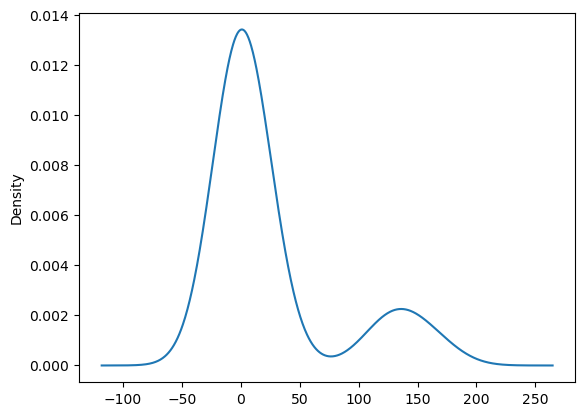

In [349]:
model_SARIMA_fit.resid.plot(kind='kde')

In [356]:
test['Predicted_SARIMA']=pred_Sarima

In [357]:
test

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,405.847057
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,390.772512
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,353.751614


<Axes: xlabel='Month'>

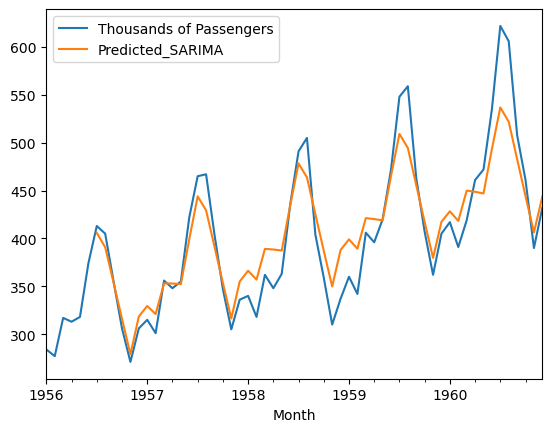

In [358]:
test[['Thousands of Passengers','Predicted_SARIMA']].plot()

# Time series EDA

In [72]:
# !pip install pandas-datareader 

In [73]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [74]:
# pdr.get_data_fred('GS10')

In [75]:
import pandas_datareader.data as web

In [76]:
data = web.DataReader('^DJI', 'stooq')

In [77]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-19,38819.61,39122.71,38761.28,39110.76,299861809.0
2024-03-18,38826.93,38898.41,38760.79,38790.43,313559132.0
2024-03-15,38809.65,38928.13,38618.20,38714.77,727712540.0
2024-03-14,39122.39,39160.25,38704.36,38905.66,347511841.0
2024-03-13,39054.58,39201.94,38937.92,39043.32,311499050.0


<Axes: xlabel='Date'>

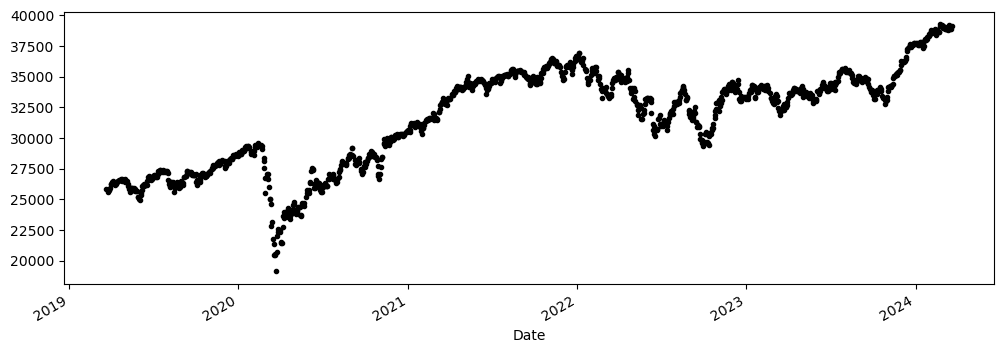

In [78]:
data['High'].plot(figsize=(12,4),style='k.')

In [79]:
share_open = data.loc['2020-06-01':]['Open']

In [80]:
share_open.index

DatetimeIndex(['2024-03-19', '2024-03-18', '2024-03-15', '2024-03-14',
               '2024-03-13', '2024-03-12', '2024-03-11', '2024-03-08',
               '2024-03-07', '2024-03-06',
               ...
               '2020-06-12', '2020-06-11', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05', '2020-06-04', '2020-06-03',
               '2020-06-02', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=957, freq=None)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-03-19 to 2019-03-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


In [83]:
# data.reset_index('Date',inplace=True)

In [84]:
from datetime import datetime

In [85]:
datetime(2021,11,12)

datetime.datetime(2021, 11, 12, 0, 0)

In [86]:
datetime.today()

datetime.datetime(2024, 3, 20, 18, 24, 7, 70129)

In [87]:
datetime.now()

datetime.datetime(2024, 3, 20, 18, 24, 7, 74220)

In [88]:
# data['Date'].day()

## Time resampling

In [89]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-19,38819.61,39122.71,38761.28,39110.76,299861809.0
2024-03-18,38826.93,38898.41,38760.79,38790.43,313559132.0
2024-03-15,38809.65,38928.13,38618.20,38714.77,727712540.0
2024-03-14,39122.39,39160.25,38704.36,38905.66,347511841.0
2024-03-13,39054.58,39201.94,38937.92,39043.32,311499050.0


In [90]:
data.resample(rule='m').min()

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-31,25490.72,25603.27,25372.26,25502.32,237227189.0
2019-04-30,26075.10,26209.49,26062.59,26143.05,203078923.0
2019-05-31,25046.31,25046.31,24809.51,24815.04,201285856.0
2019-06-30,24830.16,24935.21,24680.57,24819.78,199457524.0
2019-07-31,26719.53,26787.56,26616.21,26717.43,149781157.0
...,...,...,...,...,...
2023-11-30,33081.87,33337.15,33010.85,33274.58,118712774.0
2023-12-31,35914.45,36164.17,35914.45,36054.43,202090074.0
2024-01-31,37281.86,37371.66,37122.95,37266.67,282055770.0


In [91]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-19,38819.61,39122.71,38761.28,39110.76,299861809.0
2024-03-18,38826.93,38898.41,38760.79,38790.43,313559132.0
2024-03-15,38809.65,38928.13,38618.20,38714.77,727712540.0
2024-03-14,39122.39,39160.25,38704.36,38905.66,347511841.0
2024-03-13,39054.58,39201.94,38937.92,39043.32,311499050.0


## simple moving average

<Axes: xlabel='Date'>

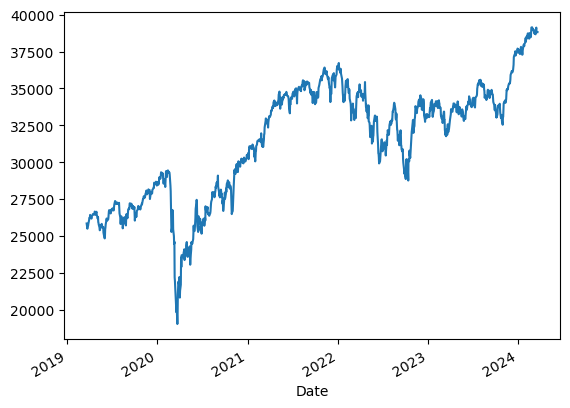

In [92]:
data['Open'].plot()

In [93]:
data['open10days'] = data['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

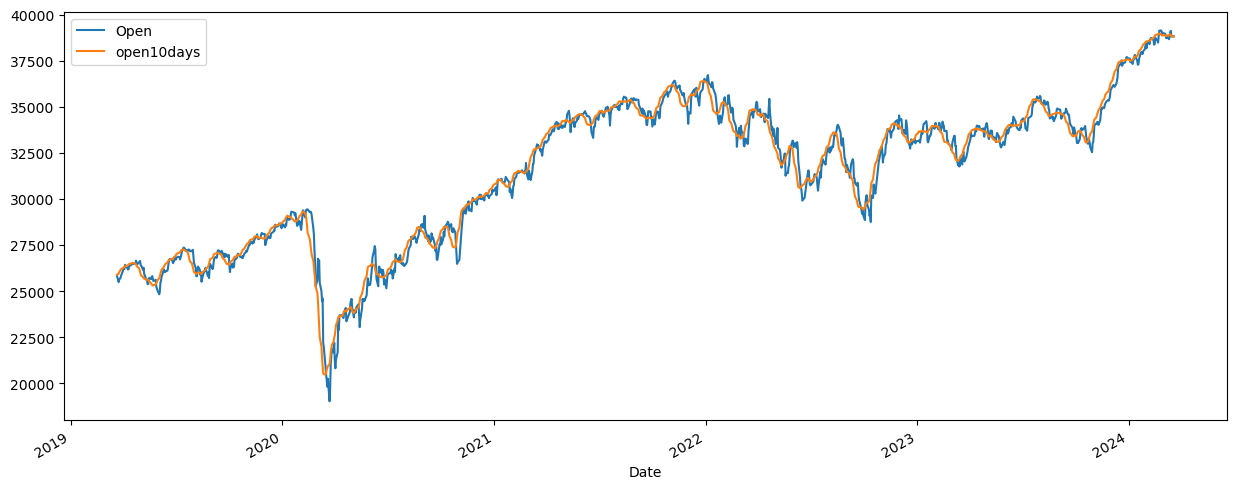

In [94]:
data[['Open','open10days']].plot(figsize=(15,6))

## Cumm weighted moving average

<Axes: xlabel='Date'>

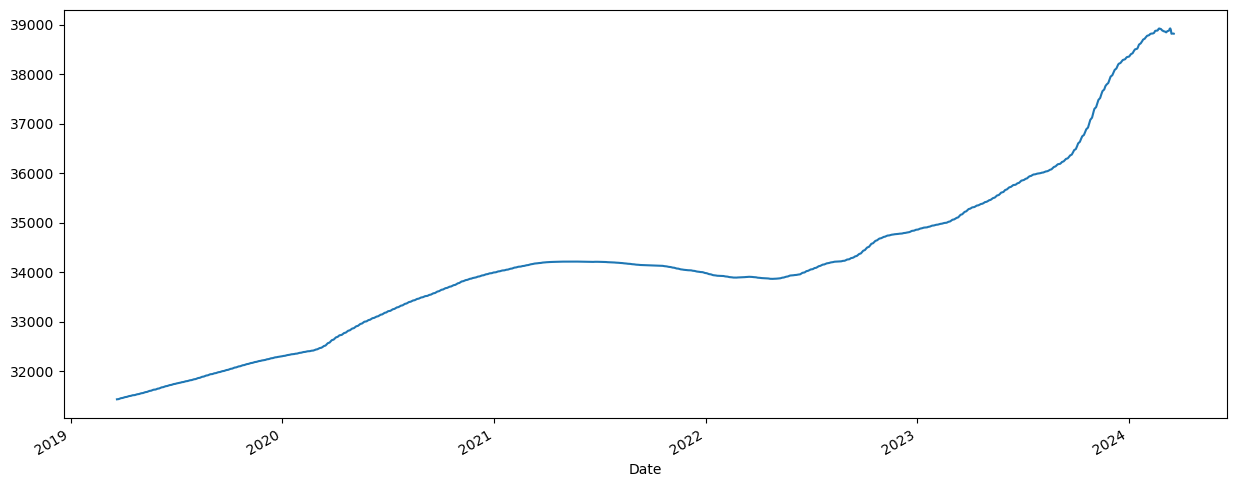

In [95]:
data['Open'].expanding().mean().plot(figsize=(15,6))

## Exponential moving average

<Axes: xlabel='Date'>

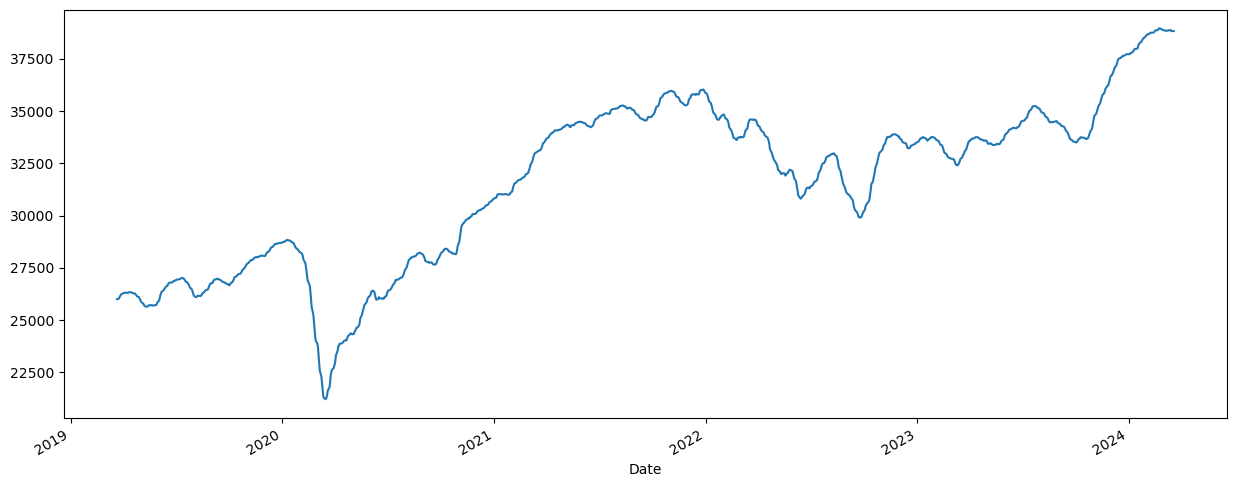

In [96]:
data['Open'].ewm(alpha=0.1,adjust=False).mean().plot(figsize=(15,6))

<Axes: xlabel='Date'>

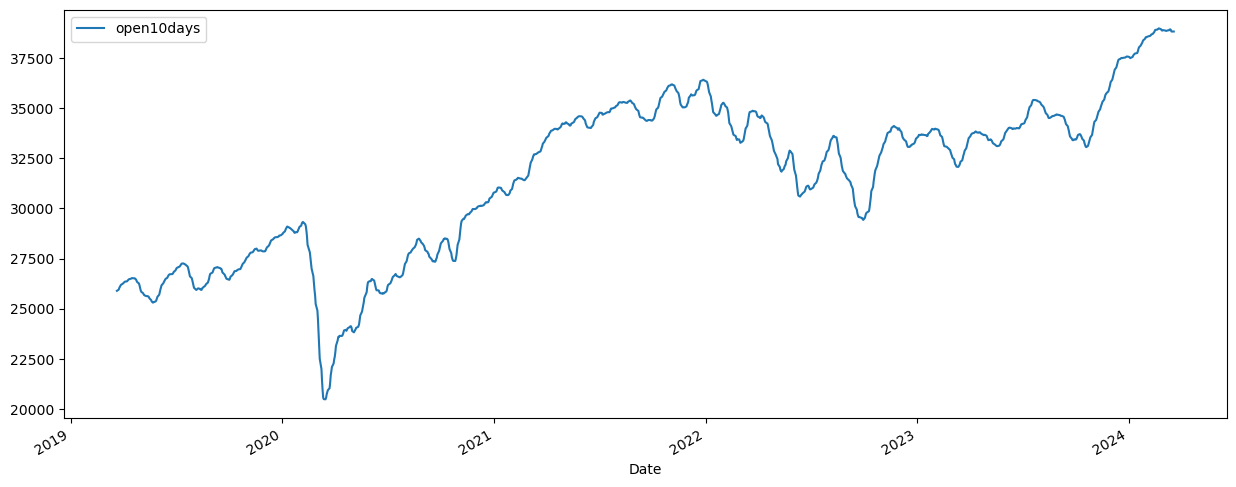

In [97]:
display(data[['open10days']].plot(figsize=(15,6)))

## Exponential weighted moving average

<Axes: xlabel='Date'>

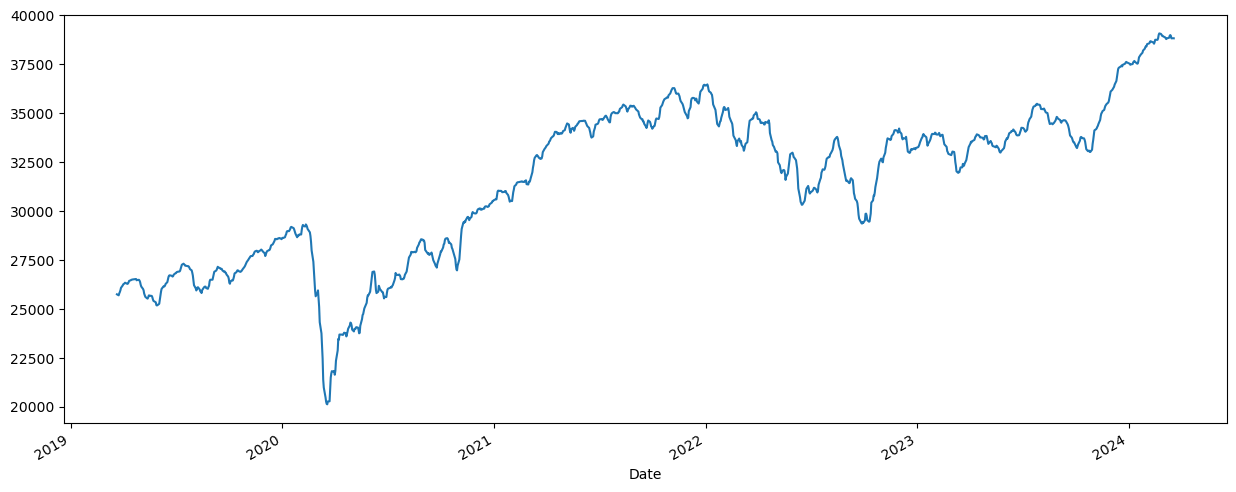

In [98]:
data['Open'].ewm(span=5).mean().plot(figsize=(15,6))